In [73]:
# common imports 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , plot_confusion_matrix, r2_score
from sklearn.metrics import  mean_squared_error as MSE
from sklearn import metrics
from sklearn.metrics import classification_report as clsr


In [105]:
# taking dataset and spiltting into train and test
df_old = pd.read_csv("AirQuality_6-level.csv")

# creating new dataframe for exculating the time notation


data = df0[['DEWP','TEMP','PRES','Iws','pm2.5']]
col = ['DEWP','TEMP','PRES','Iws','pm2.5'];

df.drop_duplicates(inplace= True)

df = pd.DataFrame(data=data,columns=col)
# df.drop_duplicates(inplace= True)
# df = df.drop_duplicates(inplace= True)
df=df.drop(df[df['pm2.5'] == 'FALSE'].index)

X = df[['DEWP','TEMP','PRES','Iws']]
y = df[['pm2.5']]

print(df.describe())
print(df)

               DEWP          TEMP          PRES           Iws
count  41757.000000  41757.000000  41757.000000  41757.000000
mean       1.750174     12.401561   1016.442896     23.866747
std       14.433658     12.175215     10.300733     49.617495
min      -40.000000    -19.000000    991.000000      0.450000
25%      -10.000000      2.000000   1008.000000      1.790000
50%        2.000000     14.000000   1016.000000      5.370000
75%       15.000000     23.000000   1025.000000     21.910000
max       28.000000     42.000000   1046.000000    565.490000
       DEWP  TEMP    PRES     Iws pm2.5
0       -16  -4.0  1020.0    1.79     1
1       -15  -4.0  1020.0    2.68     1
2       -11  -5.0  1021.0    3.57     1
3        -7  -5.0  1022.0    5.36     1
4        -7  -5.0  1022.0    6.25     1
...     ...   ...     ...     ...   ...
43795   -23  -2.0  1034.0  231.97     1
43796   -22  -3.0  1034.0  237.78     1
43797   -22  -3.0  1034.0  242.70     1
43798   -22  -4.0  1034.0  246.72     1
43

## spillting the dataset and it will be same for the all algorithm

In [106]:
X_test,X_train,y_test,y_train = train_test_split(X,y,test_size=0.3)
print(f"Shape of training data {X_train.shape,y_train.shape}")
print(f"Shape of test data {X_test.shape,y_test.shape}")

Shape of training data ((12528, 4), (12528, 1))
Shape of test data ((29229, 4), (29229, 1))


### Finding the correlation 

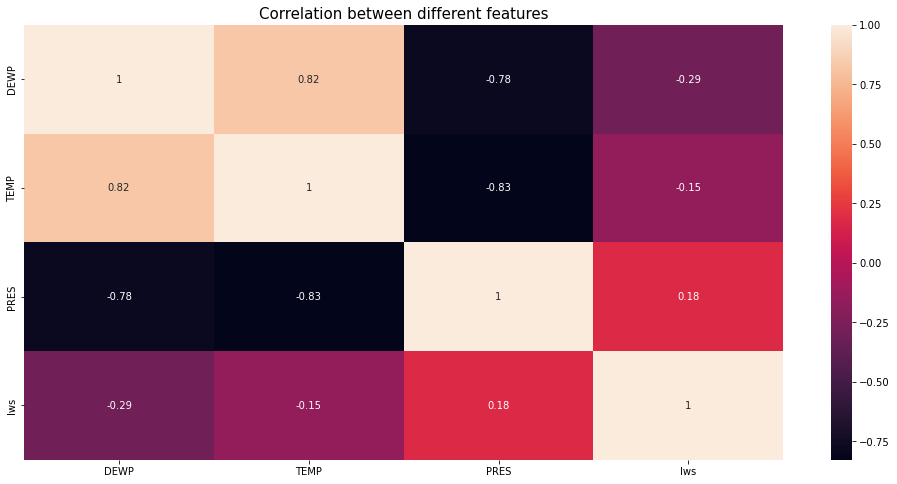

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(1, 1, figsize=(17, 8))
sns.heatmap(df.corr(), annot=True )
plt.title('Correlation between different features', fontsize = 15, c='black')
plt.show()

### Visualizing the dataset

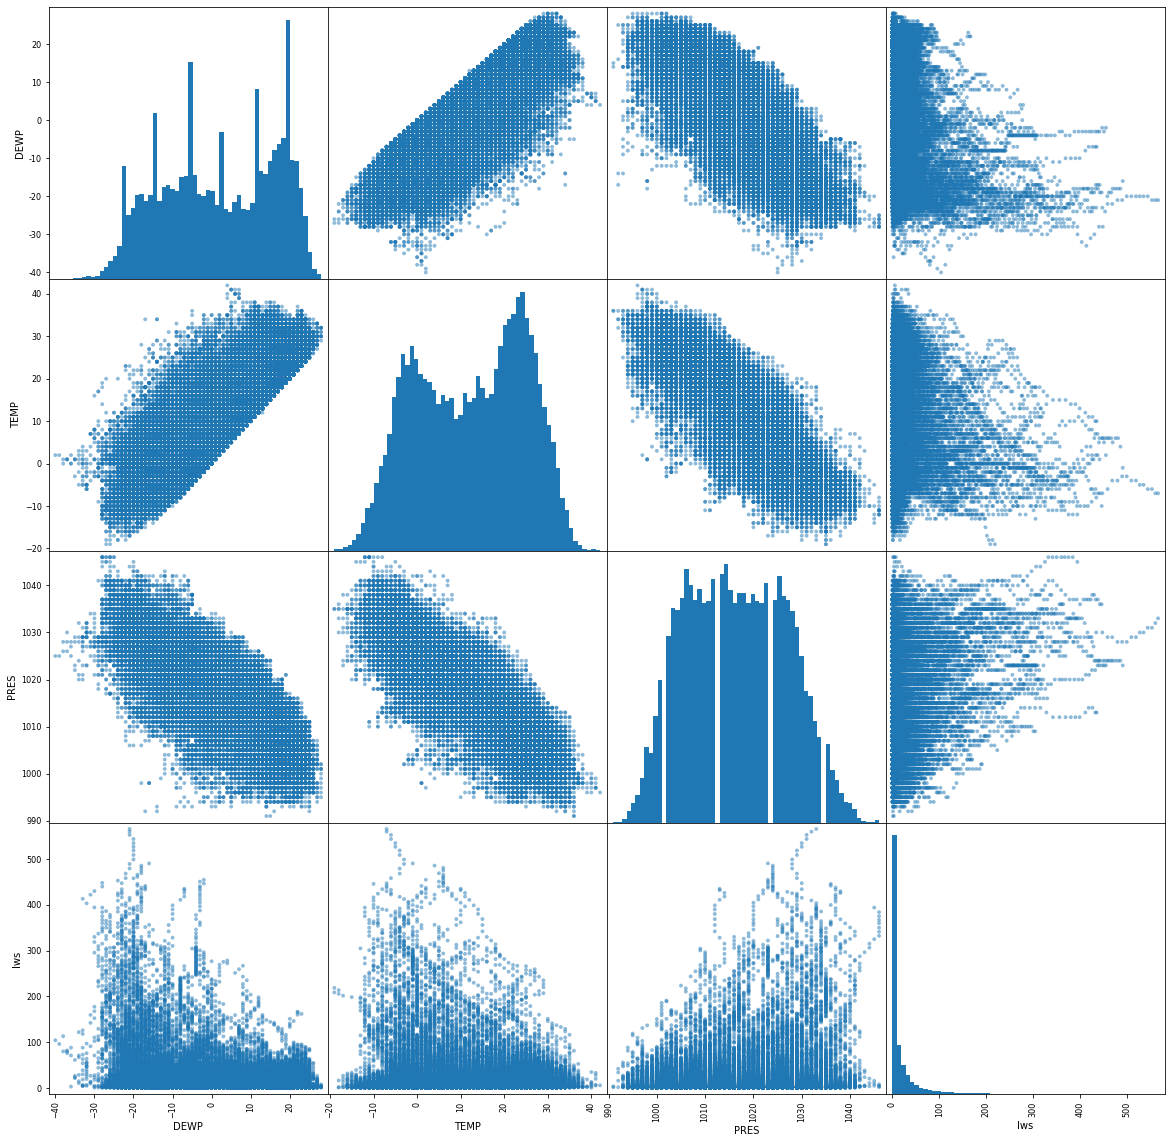

In [108]:
# visualising the dataset
import mglearn
# grr=pd.plotting.scatter_matrix(df,figsize=(20,20),hist_kwds={'bins':20},s=60,cmap=mglearn.cm3,alpha=0.8)
plt = pd.plotting.scatter_matrix(df, figsize=(20,20),s=60,cmap=mglearn.cm3,hist_kwds={'bins':60})

## The linear Regressoiin 

In [111]:
from sklearn.linear_model import LinearRegression
obj_linear_model = LinearRegression()

# fitting and predicting with linear Regression 
model_01 = obj_linear_model.fit(X_train,y_train)
y_pred_01 = linear_regression_model.predict(X_test)



print(f"The mean squared error of model is {MSE(y_test,y_pred_01)}")
print(f"The root mean square of model is {r2_score(y_test, y_pred_01)}")

### Accuracy of this model is giving error as "Classification metrics can't handle a mix of multiclass and continuous targets"  
### to see the error uncomment the following  lines
# print(classification_report(y_test, y_pred, digits=8))
# print(f"The accuracy of model is {accuracy_score(y_test,y_pred)*100}")

The mean squared error of model is 0.22678363257940964
The root mean square of model is 0.11421735500052665


### the Logistic Rregression 

In [112]:
from sklearn.linear_model import LogisticRegression

obj_logistic_regression =  LogisticRegression()
model_02 = obj_logistic_regression.fit(X_train,y_train)
y_pred_02 = model_02.predict(X_test)

print(f"The classification Report of Logistic Regression model is {clsr(y_test,y_pred_02)}")
print(f"\n\nAccuracy of the Logistic Regression model is {metrics.accuracy_score(y_test,y_pred_02)*100}")
print(f"The Mean Squared Error of model is {MSE(y_test,y_pred_02)}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisio

The classification Report of Logistic Regression model is               precision    recall  f1-score   support

           1       0.82      1.00      0.90     23922
           2       0.29      0.00      0.00      4313
           3       0.00      0.00      0.00       901
           4       0.00      0.00      0.00        80
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         5

    accuracy                           0.82     29229
   macro avg       0.18      0.17      0.15     29229
weighted avg       0.71      0.82      0.74     29229



Accuracy of the Logistic Regression model is 81.83653221116015
The Mean Squared Error of model is 0.30322624790447844


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### The DesicionTree Classifier 

In [113]:
# https://www.datacamp.com/tutorial/decision-tree-classification-python
from sklearn.tree import DecisionTreeClassifier

obj_decisiontree_classifier = DecisionTreeClassifier()
model_03 = obj_decisiontree_classifier.fit(X_train,y_train)
y_pred_03 = model_03.predict(X_test)

print(f"The default criterion is gini here")
print(f"The Classification Report of DecisionTreeClassifier is {clsr(y_test,y_pred_03)}")
print(f"The Accuracy of DecisionTreeClassifier is {accuracy_score(y_test,y_pred_03)*100}")
print(f"The Mean Squared Error of the DecisionTreeClassifier is {MSE(y_test,y_pred_03)}")


The default criterion is gini here
The Classification Report of DecisionTreeClassifier is               precision    recall  f1-score   support

           1       0.87      0.87      0.87     23922
           2       0.33      0.35      0.34      4313
           3       0.22      0.22      0.22       901
           4       0.08      0.07      0.08        80
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         5

    accuracy                           0.77     29229
   macro avg       0.25      0.25      0.25     29229
weighted avg       0.77      0.77      0.77     29229

The Accuracy of DecisionTreeClassifier is 76.75254028533305
The Mean Squared Error of the DecisionTreeClassifier is 0.364808922645318


In [ ]:
## decision tree image

# from sklearn.externals.six import StringIO  
# from IPython.display import Image  
# from sklearn.tree import export_graphviz
# import pydotplus
# dot_data = StringIO()
# export_graphviz(clf, out_file=dot_data,  
#                 filled=True, rounded=True,
#                 special_characters=True, feature_names = feature_cols,class_names=['0','1'])
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
# graph.write_png('diabetes.png')
# Image(graph.create_png())

In [114]:
# https://www.datacamp.com/tutorial/decision-tree-classification-python
obj_decisiontree_classifier_01 = DecisionTreeClassifier(criterion="entropy",max_depth=4)
model_03_1 = obj_decisiontree_classifier_01.fit(X_train,y_train)
y_pred_03_1 = model_03_1.predict(X_test)

print(f"The Classification Report of DecisionTreeClassifier with criterion is \n{clsr(y_test,y_pred_03_1)}")
print(f"The Accuracy of DecisionTreeClassifier with criterion is {accuracy_score(y_test,y_pred_03_1)*100}")
print(f"The Mean Squared Error of the DecisionTreeClassifier with criterion is {MSE(y_test,y_pred_03_1)}")


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The Classification Report of DecisionTreeClassifier with criterion is 
              precision    recall  f1-score   support

           1       0.82      1.00      0.90     23922
           2       0.00      0.00      0.00      4313
           3       0.00      0.00      0.00       901
           4       0.00      0.00      0.00        80
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         5

    accuracy                           0.82     29229
   macro avg       0.14      0.17      0.15     29229
weighted avg       0.67      0.82      0.74     29229

The Accuracy of DecisionTreeClassifier with criterion is 81.83995347086798
The Mean Squared Error of the DecisionTreeClassifier with criterion is 0.304286838413904


### The RandomForestTree Classifier

In [116]:
from sklearn.ensemble import RandomForestClassifier

obj_randomforestclassifier = RandomForestClassifier(n_estimators=100)
model_04 =  obj_randomforestclassifier.fit(X_train,y_train)
y_pred_04 = model_04.predict(X_test)

print(f"The Classification Report of RandomForestClassifier is \n{clsr(y_test,y_pred_04)}")
print(f"The Accuracy of RandomForestClassifier is {accuracy_score(y_test,y_pred_04)*100}")
print(f"The Mean Squared Error of the RandomForestClassifier is {MSE(y_test,y_pred_04)}")


C:\Users\user\AppData\Local\Temp\ipykernel_15032\1102031758.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_04 =  obj_randomforestclassifier.fit(X_train,y_train)


The Classification Report of RandomForestClassifier is 
              precision    recall  f1-score   support

           1       0.87      0.95      0.90     23922
           2       0.45      0.28      0.35      4313
           3       0.34      0.15      0.21       901
           4       0.21      0.05      0.08        80
           5       0.00      0.00      0.00         8
           6       0.00      0.00      0.00         5

    accuracy                           0.82     29229
   macro avg       0.31      0.24      0.26     29229
weighted avg       0.79      0.82      0.80     29229

The Accuracy of RandomForestClassifier is 82.04180779362962
The Mean Squared Error of the RandomForestClassifier is 0.26678983201614836
